# Competitive Analysis and Performance Evaluation of Nike and Adidas

# Installating packages

To install PySpark and Py4J.

In [1]:
!pip install pyspark py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=5e4c251a702ec0d618ad6e8e36870d19b4313967ccef8bbf895485857a145be2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


# Importing Required Libraries

Import the SparkSession.





In [2]:
from pyspark.sql import SparkSession

To read the Excel file using pandas, we need to import the pandas library as pd.

In [4]:
import pandas as pd

Import matplotlib for ploting

In [32]:
import matplotlib.pyplot as plt

Import Seaborn for ploting

In [33]:
import seaborn as sns

Import warnings to ignore

In [76]:
import warnings

# Create Spark Session

created a Spark session with the name "AdidasAndNikeAnalysisProject."

In [3]:
spark = SparkSession.builder.appName("AdidasAndNikeAnalysisProject").getOrCreate()

# Data Cleaning and Pre Processing

In [5]:
# Read the Excel file into a pandas DataFrame with the 'openpyxl' engine
excel_data = pd.read_csv("AdidasNike.csv")

# Convert the pandas DataFrame to a PySpark DataFrame using the existing Spark session
df = spark.createDataFrame(excel_data)

# Display the PySpark DataFrame
df.show()

+--------------------+----------+-------------+----------+--------+--------------------+--------------------+------+-------+-------------------+
|        Product Name|Product ID|Listing Price|Sale Price|Discount|               Brand|         Description|Rating|Reviews|       Last Visited|
+--------------------+----------+-------------+----------+--------+--------------------+--------------------+------+-------+-------------------+
|Women's adidas Or...|    AH2430|        14999|      7499|      50|Adidas Adidas ORI...|Channeling the st...|   4.8|     41|2020-04-13T15:06:14|
|Women's adidas Or...|    G27341|         7599|      3799|      50|    Adidas ORIGINALS|A modern take on ...|   3.3|     24|2020-04-13T15:06:15|
|Women's adidas Sw...|    CM0081|          999|       599|      40|   Adidas CORE / NEO|These adidas Puka...|   2.6|     37|2020-04-13T15:06:15|
|Women's adidas Sp...|    B44832|         6999|      3499|      50|   Adidas CORE / NEO|Inspired by moder...|   4.1|     35|2020-0

# Goals and In-Depth Analysis

Goal 1: Analyze brand product quantity and proportions

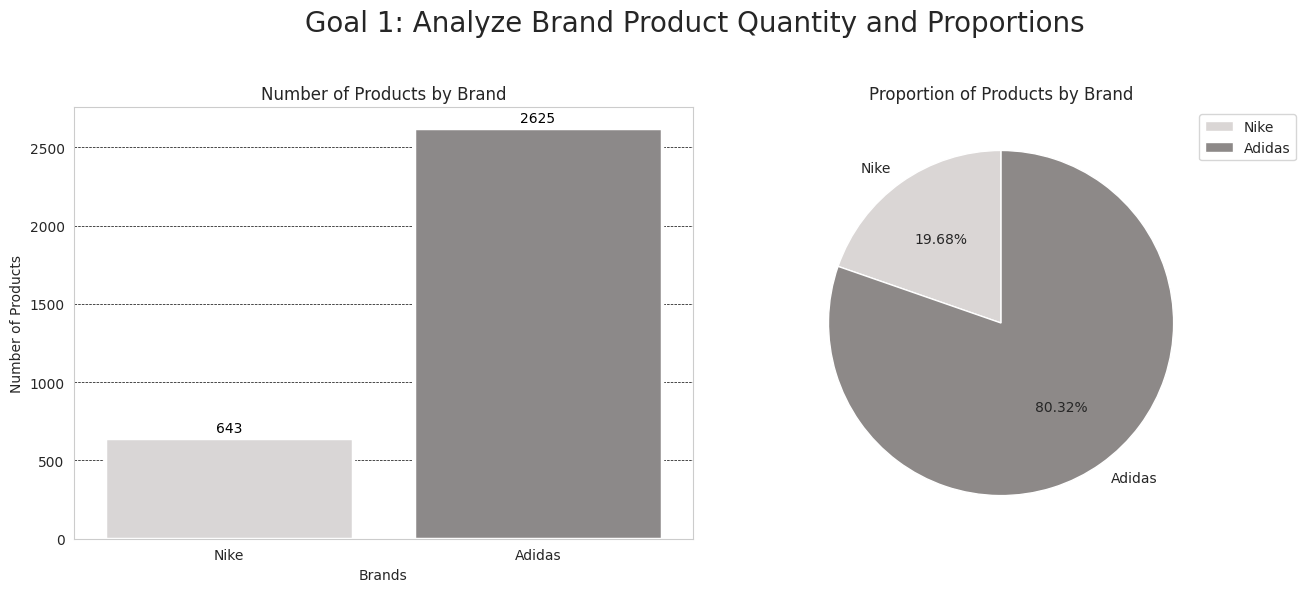

In [85]:

# Load data from the uploaded CSV file
file_path = '/content/AdidasNike.csv'
data = pd.read_csv(file_path)

# Filter Nike and Adidas products
nike_products = data[data['Brand'].str.lower().str.contains('nike', na=False)]
adidas_products = data[data['Brand'].str.lower().str.contains('adidas', na=False)]

# Count the number of Nike and Adidas products
num_nike = len(nike_products)
num_adidas = len(adidas_products)

# Customize plots with a tan and charcoal color palette
custom_palette = ["#DAD6D5", "#8D8988"]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Adjusted the figsize
fig.suptitle("Goal 1: Analyze Brand Product Quantity and Proportions", fontsize=20)

# Bar chart
sns.barplot(x=['Nike', 'Adidas'], y=[num_nike, num_adidas], palette=custom_palette, ax=ax1, linewidth=2.5)  # Added linewidth
ax1.set_title("Number of Products by Brand")
ax1.set_xlabel("Brands")
ax1.set_ylabel("Number of Products")
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5, color='black')  # Add only horizontal grid lines

# Add data labels on the bars
for i, v in enumerate([num_nike, num_adidas]):
    ax1.text(i, v + 20, str(v), color='black', ha='center', va='bottom')

# Pie Chart
ax2.set_title("Proportion of Products by Brand")
ax2.pie([num_nike, num_adidas], labels=['Nike', 'Adidas'], autopct='%.2f%%', colors=custom_palette, startangle=90)
ax2.grid(True)  # Add grid lines

# Add legend for color differentiation to the right of the pie chart
ax2.legend(labels=['Nike', 'Adidas'], loc='upper right', bbox_to_anchor=(1.2, 1))

fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusted the rect parameter

# Display the plots
plt.show()


Goal 2 : Calculate the average sales amount per brand

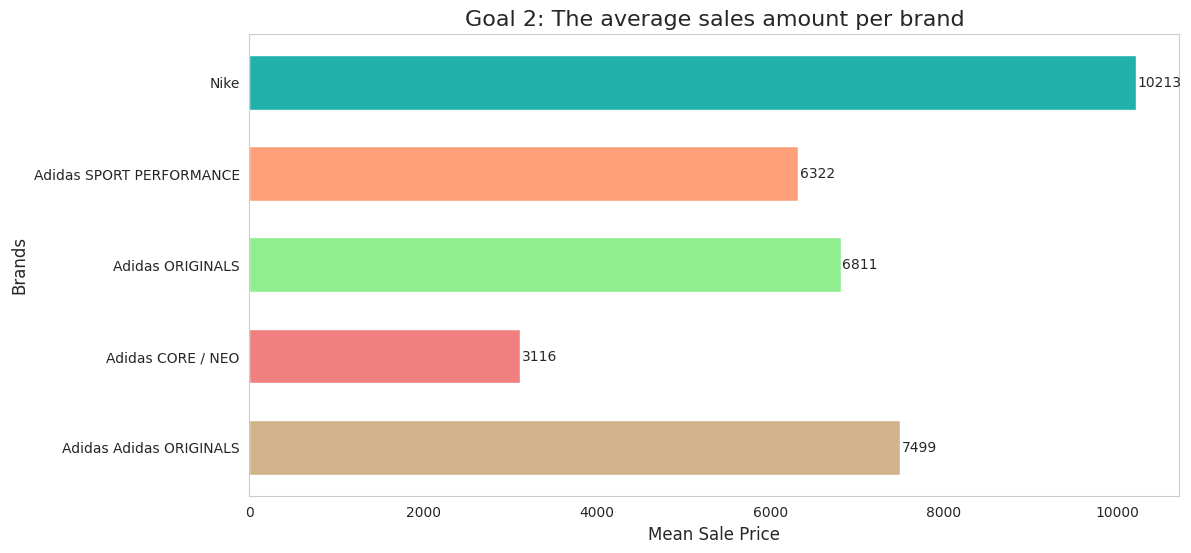

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
AdidasNike = pd.read_csv('/content/AdidasNike.csv')

# Group the data by brand and calculate the mean sale price for each brand
brand_sale_price = AdidasNike.groupby('Brand')['Sale Price'].mean().reset_index()

# Define a list of unique colors for each brand
colors = ['tan', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Create a horizontal bar chart with modifications
plt.figure(figsize=(12, 6))
bars = plt.barh(brand_sale_price['Brand'], brand_sale_price['Sale Price'], color=colors, height=0.6)
plt.ylabel('Brands', fontsize=12)
plt.xlabel('Mean Sale Price', fontsize=12)
plt.title('Goal 2: The average sales amount per brand', fontsize=16)
plt.xlim(0, max(brand_sale_price['Sale Price']) + 500)  # Adjust the x-axis limit

# Add data labels on the right side of the bars
for bar in bars:
    plt.text(bar.get_width() + 20, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va='center')
plt.grid(False)
plt.show()


Goal 3 : Comparing the Average Listing Prices of Nike and Adidas

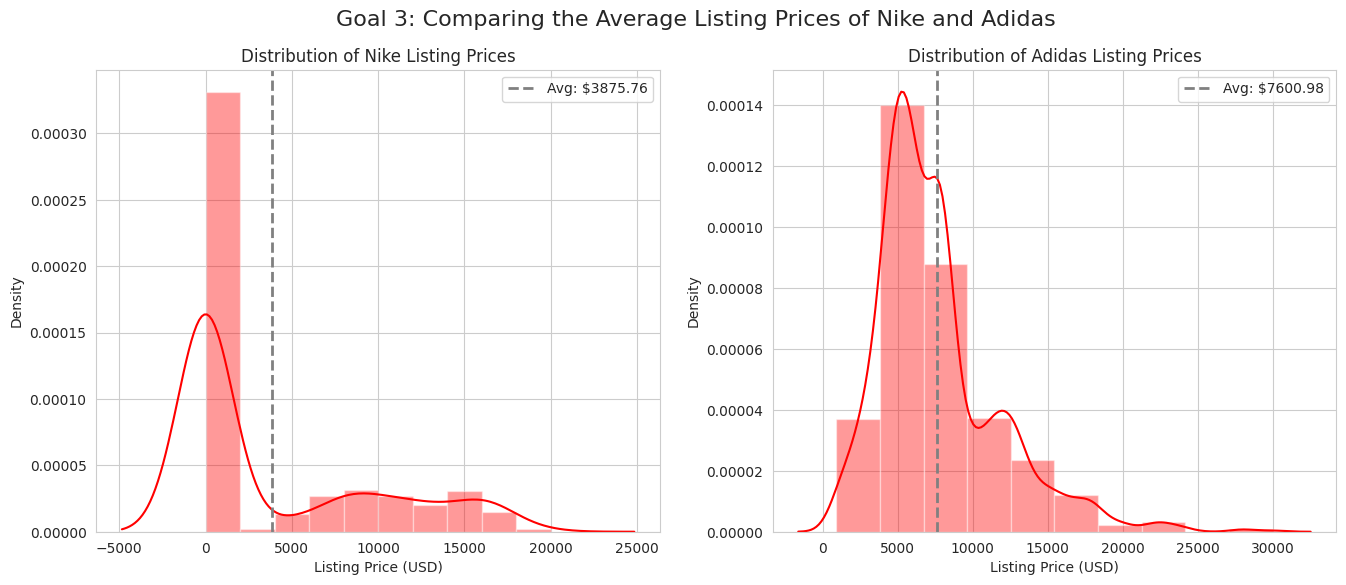

In [78]:

# Load the dataset from the Excel file
file_path = '/content/AdidasNike.csv'  # Update the file path based on your actual path
AdidasNike = pd.read_csv(file_path)

#Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Filter Nike products
nike_products = AdidasNike[AdidasNike['Brand'].str.lower().str.contains('nike', na=False)]

# Filter Adidas products
adidas_products = AdidasNike[AdidasNike['Brand'].str.lower().str.contains('adidas', na=False)]

# Calculate the average listing price for Nike and Adidas
avg_listing_price_nike = nike_products['Listing Price'].mean()
avg_listing_price_adidas = adidas_products['Listing Price'].mean()

# Set the style to whitegrid
sns.set_style('whitegrid')

# Define the color palette
nike_color = 'red'
adidas_color = 'red'

# Create subplots for Nike and Adidas side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Nike's plot
sns.distplot(nike_products['Listing Price'], bins=10, color=nike_color, kde_kws={'color': 'red'}, ax=axes[0])
axes[0].axvline(avg_listing_price_nike, color='gray', linestyle='dashed', linewidth=2, label=f'Avg: ${avg_listing_price_nike:.2f}')
axes[0].set_title('Distribution of Nike Listing Prices')
axes[0].set_xlabel('Listing Price (USD)')
axes[0].set_ylabel('Density')
axes[0].legend()

# Adidas's plot
sns.distplot(adidas_products['Listing Price'], bins=10, color=adidas_color, kde_kws={'color': 'red'}, ax=axes[1])
axes[1].axvline(avg_listing_price_adidas, color='gray', linestyle='dashed', linewidth=2, label=f'Avg: ${avg_listing_price_adidas:.2f}')
axes[1].set_title('Distribution of Adidas Listing Prices')
axes[1].set_xlabel('Listing Price (USD)')
axes[1].set_ylabel('Density')
axes[1].legend()

fig.suptitle('Goal 3: Comparing the Average Listing Prices of Nike and Adidas', fontsize=16)

plt.show()


Goal 4 : . To assess the relationships among listing price, selling price, rating, discount, and reviews

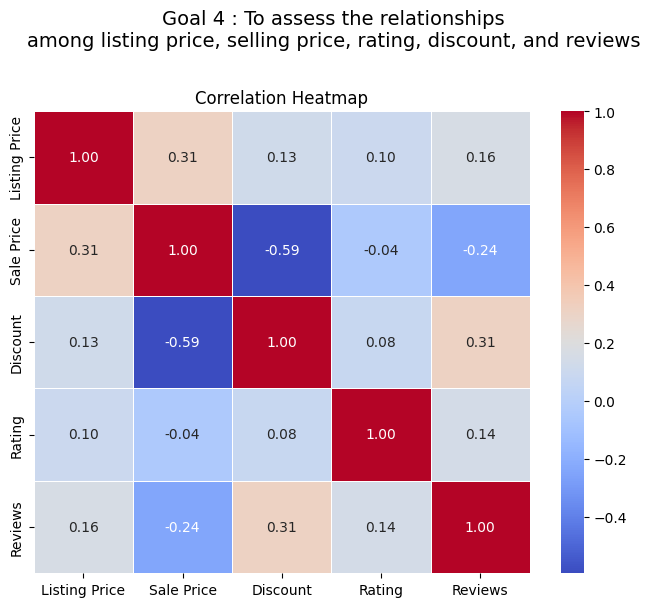

In [21]:
# Load your dataset from the CSV file
df = pd.read_csv('AdidasNike.csv')

# Select the relevant columns for correlation analysis
selected_columns = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

# Create a DataFrame with the selected columns
df1 = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.suptitle('Goal 4 : To assess the relationships\namong listing price, selling price, rating, discount, and reviews', fontsize=14, y=1.05)
plt.title('Correlation Heatmap', fontsize=12)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


Goal 5 : Comparing Listing Price vs. Discount for Nike and Adidas Subbrands

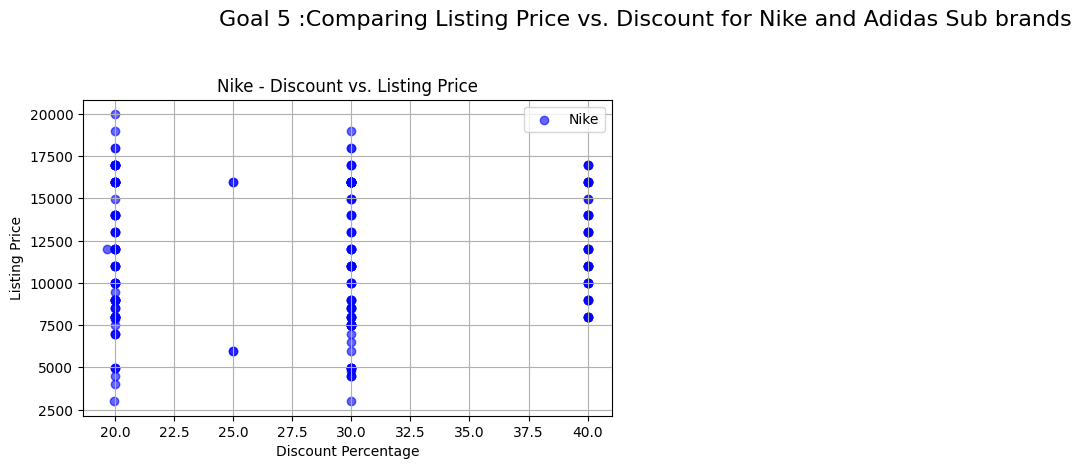

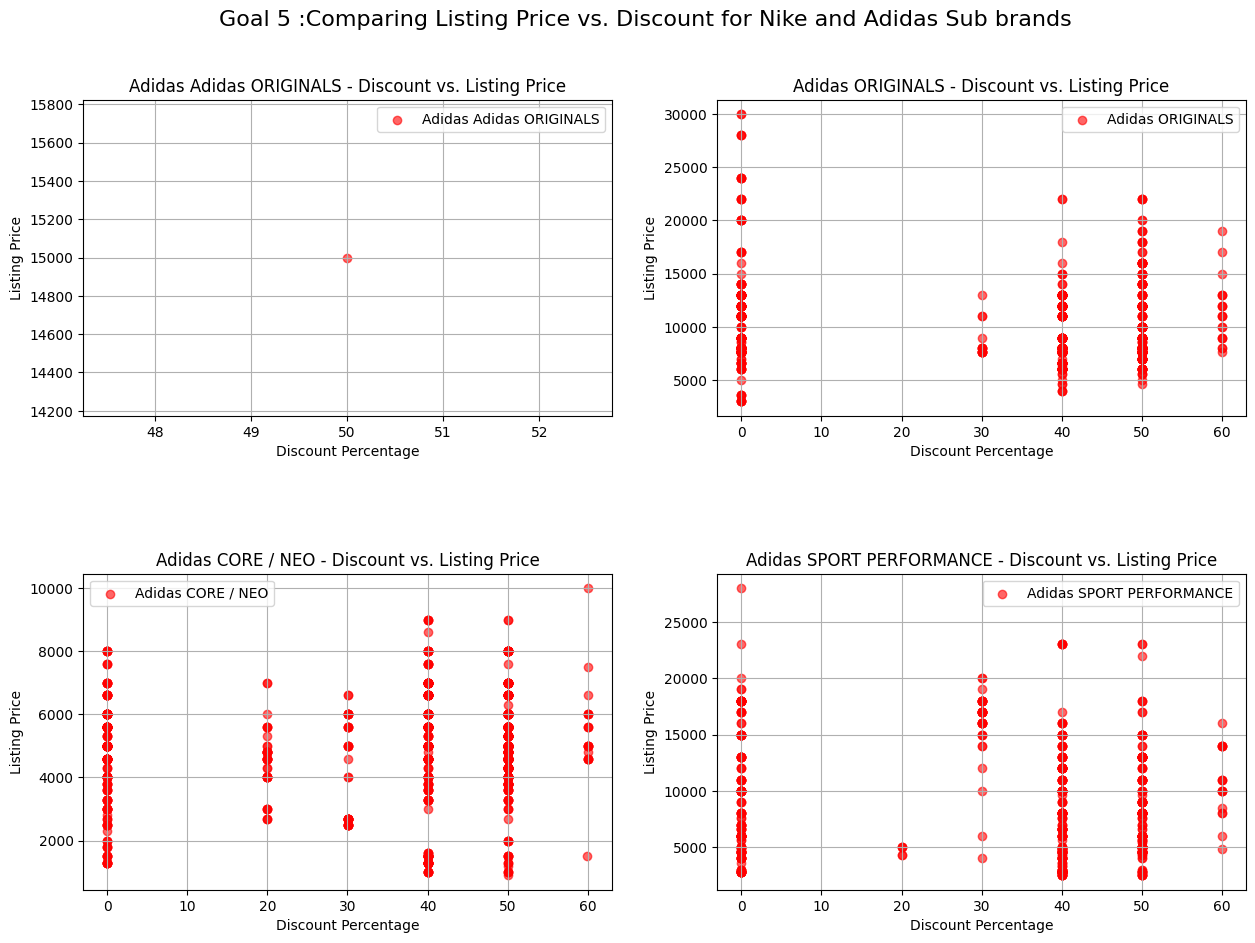

In [56]:


# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('AdidasNike.csv')

# Calculate the discount percentage for each product
df['Discount Percentage'] = (1 - (df['Sale Price'] / df['Listing Price'])) * 100

# Get unique brands within Nike and Adidas
nike_brands = df[df['Brand'].str.contains('Nike')]['Brand'].unique()
adidas_brands = df[df['Brand'].str.contains('Adidas')]['Brand'].unique()

# Define colors or markers for brands (adjust as needed)
brand_colors = {
    'Nike': 'blue',
    'Adidas': 'red',
    # Add more brands and colors as needed
}

# Create subplots for Nike brands
plt.figure(figsize=(15, 10))
plt.suptitle('Goal 5 :Comparing Listing Price vs. Discount for Nike and Adidas Sub brands', fontsize=16, y=0.99)

for i, brand in enumerate(nike_brands, 1):
    plt.subplot(2, 2, i)
    brand_data = df[df['Brand'] == brand]
    plt.scatter(
        brand_data['Discount Percentage'],
        brand_data['Listing Price'],
        label=brand,
        color=brand_colors['Nike'],
        alpha=0.6,
    )
    plt.title(f'{brand} - Discount vs. Listing Price')
    plt.xlabel('Discount Percentage')
    plt.ylabel('Listing Price')
    plt.legend()
    plt.grid(True)

# Manually adjust layout to prevent shaking
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()

# Create subplots for Adidas brands
plt.figure(figsize=(15, 10))
plt.suptitle('Goal 5 :Comparing Listing Price vs. Discount for Nike and Adidas Sub brands', fontsize=16, y=0.99)

for i, brand in enumerate(adidas_brands, 1):
    plt.subplot(2, 2, i)
    brand_data = df[df['Brand'] == brand]
    plt.scatter(
        brand_data['Discount Percentage'],
        brand_data['Listing Price'],
        label=brand,
        color=brand_colors['Adidas'],
        alpha=0.6,
    )
    plt.title(f'{brand} - Discount vs. Listing Price')
    plt.xlabel('Discount Percentage')
    plt.ylabel('Listing Price')
    plt.legend()
    plt.grid(True)

# Manually adjust layout to prevent shaking
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()


Goal 6:Distribution of listing and selling price of nike and adidas.

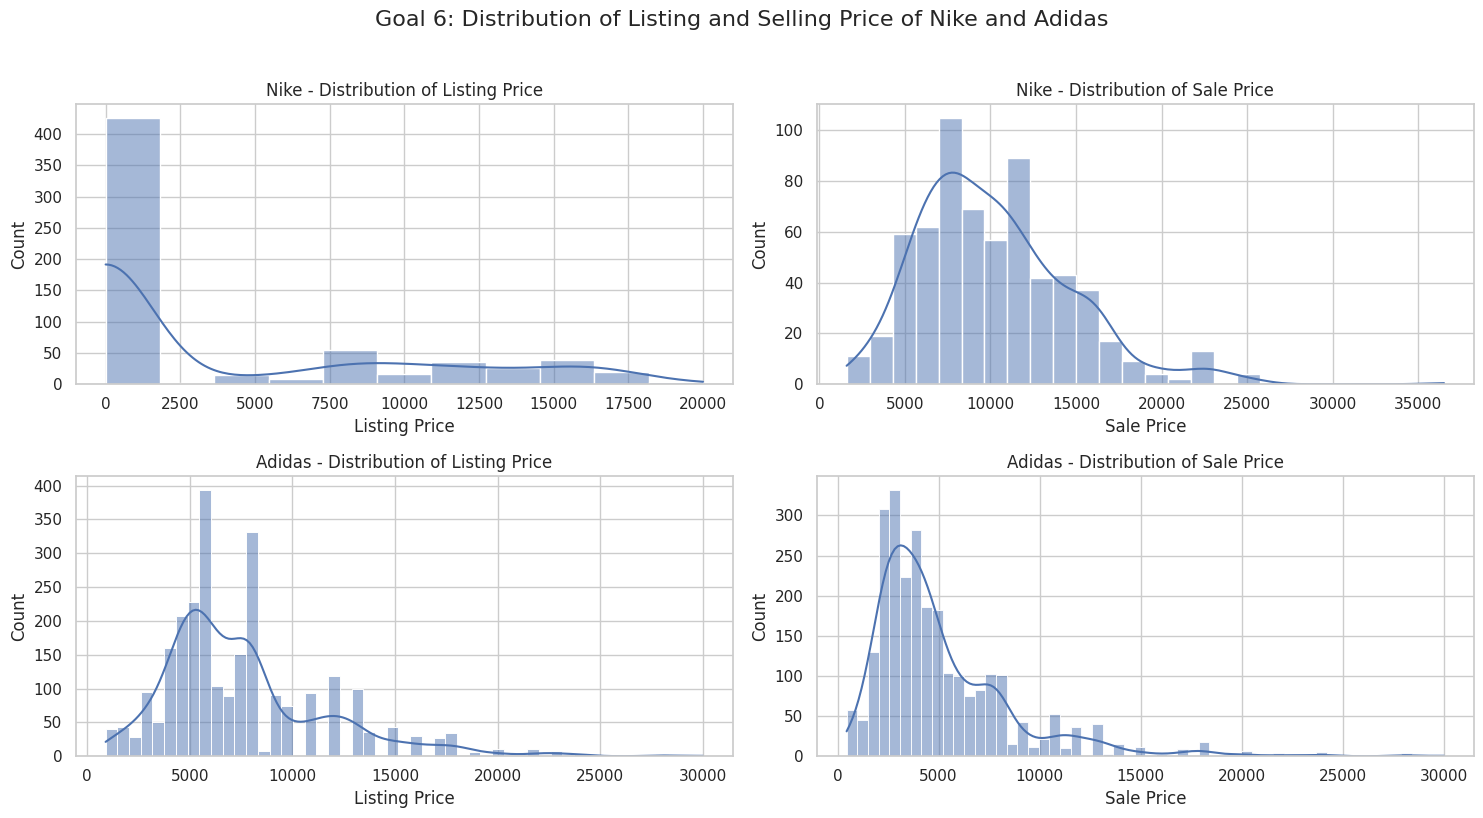

In [76]:


# Load the data from the CSV file in Colab
df = pd.read_csv('/content/AdidasNike.csv')  # Adjust the file path as needed

# Extract sub-brand information from the 'Brand' column
df['Subbrand'] = df['Brand'].apply(lambda x: 'Adidas' if 'Adidas' in x else 'Nike')

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for Nike distribution
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
numerical_columns_nike = ['Listing Price', 'Sale Price']

for i in range(len(numerical_columns_nike)):
    sns.histplot(data=df[df['Subbrand'] == 'Nike'], x=numerical_columns_nike[i], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Nike - Distribution of {numerical_columns_nike[i]}')

# Create subplots for Adidas distribution
for i in range(len(numerical_columns_nike)):
    sns.histplot(data=df[df['Subbrand'] == 'Adidas'], x=numerical_columns_nike[i], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Adidas - Distribution of {numerical_columns_nike[i]}')

# Add main heading
plt.suptitle('Goal 6: Distribution of Listing and Selling Price of Nike and Adidas', fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Goal 7: Assess user engagement and visit frequency for the products

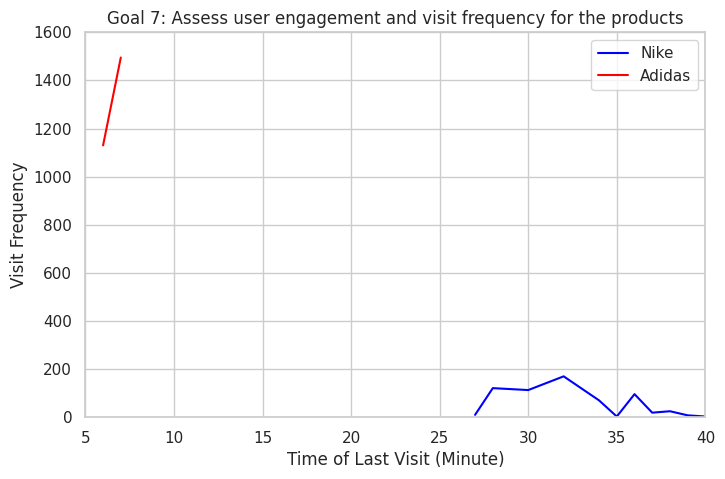

In [95]:
from datetime import datetime, timedelta
from collections import Counter

plt.figure(figsize=(8, 5))

# Assuming 'Last Visited' is a timestamp column
df['Last Visited'] = pd.to_datetime(df['Last Visited'])

# Extract minute information
df['Minute'] = df['Last Visited'].dt.minute

# Filter data for minutes 5 to 40
filtered_df = df[(df['Minute'] >= 5) & (df['Minute'] <= 40)]

# Group data by minute for Nike and Adidas
nike_counter = Counter(filtered_df[filtered_df['Brand'] == 'Nike']['Minute'])
adidas_counter = Counter(filtered_df[filtered_df['Brand'].str.contains('Adidas')]['Minute'])

nike_time_df = pd.DataFrame.from_dict(nike_counter, orient='index', columns=['count'])
adidas_time_df = pd.DataFrame.from_dict(adidas_counter, orient='index', columns=['count'])

# Sort data by minute
nike_time_df.sort_index(inplace=True)
adidas_time_df.sort_index(inplace=True)

# Plot the line graph
sns.set_style("whitegrid")
sns.lineplot(y="count", x=nike_time_df.index, data=nike_time_df, label="Nike", color="blue")
sns.lineplot(y="count", x=adidas_time_df.index, data=adidas_time_df, label="Adidas", color="red")

plt.ylim(0, max(nike_time_df['count'].max(), adidas_time_df['count'].max()) + 10)
plt.yticks(range(0, 1601, 200))  # Set y-axis intervals to 200
plt.xlim(5, 40)
plt.xlabel("Time of Last Visit (Minute)")
plt.ylabel("Visit Frequency")
plt.title("Goal 7: Assess user engagement and visit frequency for the products")
plt.legend()

plt.show()


Goal 8 :Forecasting Nike Sales Prices

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided a

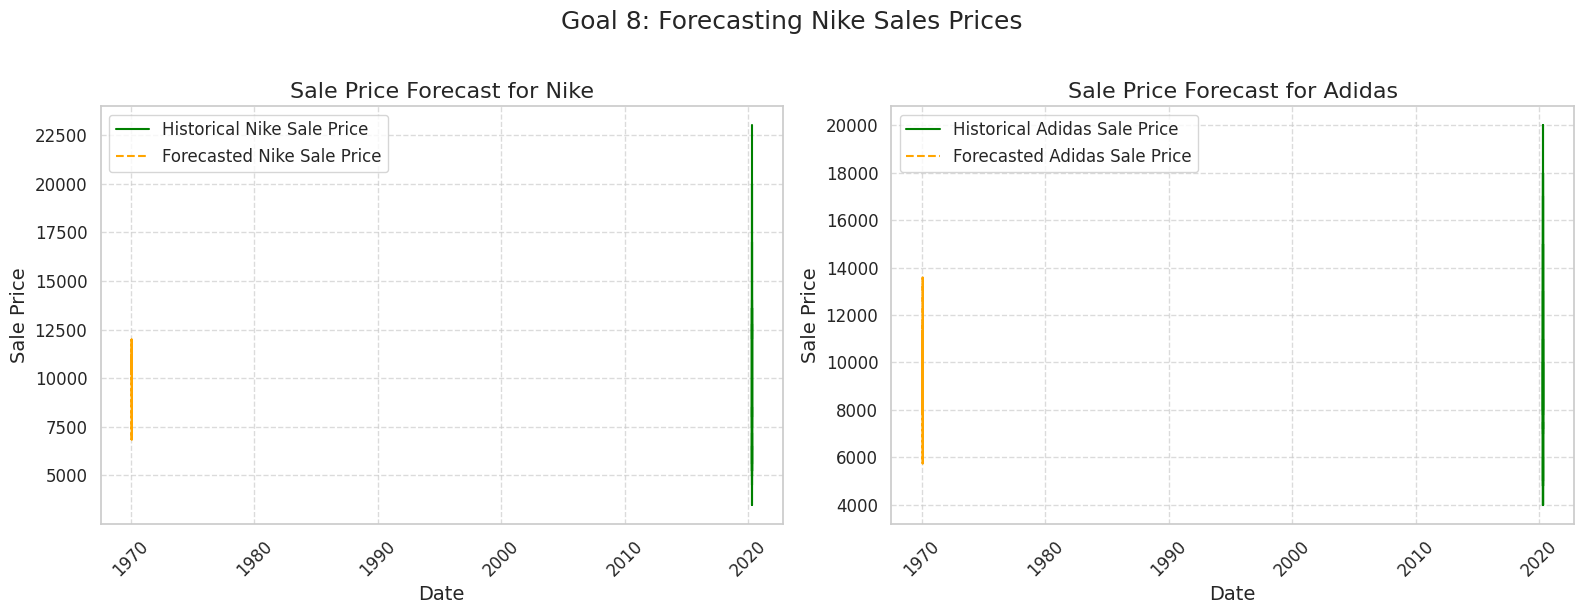

In [109]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your dataset, assuming you have a 'Last Visited' and 'Brand' column
df = pd.read_csv('AdidasNike.csv')

# Convert the 'Last Visited' column to datetime
df['Last Visited'] = pd.to_datetime(df['Last Visited'])

# Filter data for Nike
nike_data = df[df['Brand'] == 'Nike']

# Select a smaller time frame for forecasting (e.g., the last 30 data points)
nike_data = nike_data[-30:]

# Perform sales forecasting using Holt-Winters method
model_nike = ExponentialSmoothing(nike_data['Sale Price'], seasonal='add', seasonal_periods=7)
result_nike = model_nike.fit()

# Forecast future "Sale Price" for Nike
forecast_nike = result_nike.forecast(steps=14)  # Forecast for the next two weeks

# Create a line chart to visualize historical and forecasted "Sale Price" for Nike
plt.figure(figsize=(16, 6))

# Add main heading
plt.suptitle('Goal 8: Forecasting Nike Sales Prices', fontsize=18, y=1.02)

# Plot for Nike
plt.subplot(1, 2, 1)
plt.plot(nike_data['Last Visited'], nike_data['Sale Price'], label='Historical Nike Sale Price', color='green')
plt.plot(forecast_nike.index, forecast_nike, linestyle='--', color='orange', label='Forecasted Nike Sale Price')
plt.title('Sale Price Forecast for Nike', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Filter data for Adidas (combining all sub-brands)
adidas_data = df[df['Brand'].str.contains('Adidas')]

# Select a smaller time frame for forecasting (e.g., the last 30 data points)
adidas_data = adidas_data[-30:]

# Perform sales forecasting using Holt-Winters method
model_adidas = ExponentialSmoothing(adidas_data['Sale Price'], seasonal='add', seasonal_periods=7)
result_adidas = model_adidas.fit()

# Forecast future "Sale Price" for Adidas
forecast_adidas = result_adidas.forecast(steps=14)  # Forecast for the next two weeks

# Create a line chart to visualize historical and forecasted "Sale Price" for Adidas
plt.subplot(1, 2, 2)
plt.plot(adidas_data['Last Visited'], adidas_data['Sale Price'], label='Historical Adidas Sale Price', color='green')
plt.plot(forecast_adidas.index, forecast_adidas, linestyle='--', color='orange', label='Forecasted Adidas Sale Price')
plt.title('Sale Price Forecast for Adidas', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
